# Data 620 Assignment: “Hello, graph world”

Jithendra Seneviratne, Sheryl Piechocki 

June 6, 2020

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### NetworkX Inbuild Krackhardt Graph

This is the inbuilt Krackhardt graph in NetworkX. We'll try to replicate it using random names.

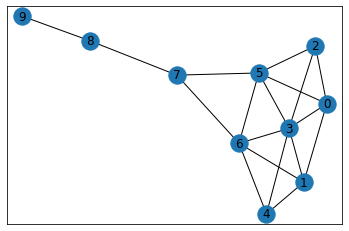

In [3]:
K = nx.krackhardt_kite_graph()
nx.draw_networkx(K)

### Manual Creation of Krackhardt Graph

The list of indices were borrowed from the Krackhardt graph function in NetworkX

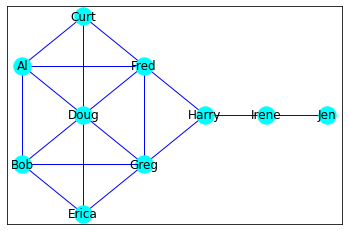

In [4]:
G=nx.Graph()

name_list = ['Al','Bob','Curt','Doug','Erica','Fred','Greg','Harry','Irene','Jen']

index_list = [[2,3,4,6],
              [1,4,5,7],
              [1,4,6],
              [1,2,3,5,6,7],
              [2,4,7],
              [1,3,4,7,8],
              [2,4,5,6,8],
              [6,7,9],
              [8,10],
              [9]]

# set the positions for the nodes
pos = {'Al': (0, 1),
       'Bob': (0, -1),
       'Curt': (1, 2),
       'Doug': (1, 0),
       'Erica': (1, -2),
       'Fred': (2, 1),
       'Greg': (2, -1),
       'Harry': (3, 0),
       'Irene': (4, 0),
       'Jen': (5, 0)}


network = []
for i in range(len(index_list)):
    for j in index_list[i]:
        network.append((name_list[i],name_list[j-1]))
        
G.add_edges_from(network)

nx.draw_networkx(G,
        pos=pos, 
        edge_color='blue',
        node_color='cyan')

### Real World Data

We'll use [EU email data](https://snap.stanford.edu/data/email-Eu-core.html) to explore NetworkX functionality further. Names of departments have been anonymized. Each tuple in the dataset represents a connection.

In [5]:
df = pd.read_csv('email-Eu-core.txt',
                 sep=',')

df['from_to'] = df['0 1'].apply(lambda x: x.split(' '))

In [6]:
df.head()

0 1 from_to
0  2 3  [2, 3]
1  2 4  [2, 4]
2  5 6  [5, 6]
3  5 7  [5, 7]
4  8 9  [8, 9]

### Let's use only the top 200 rows in order to read the graph clearly.

Since we have senders and recipients, we can create a directed graph

In [25]:
C = nx.DiGraph()
C.add_edges_from(df['from_to'][:200])

In [26]:
list(C.edges())[:10]

[('2', '3'),
 ('2', '4'),
 ('4', '2'),
 ('4', '3'),
 ('5', '6'),
 ('5', '7'),
 ('8', '9'),
 ('10', '11'),
 ('12', '13'),
 ('12', '14')]

### Plot first 200 connections

This is not the complete graph. We're showing a subset for the purpose of a clear visualization

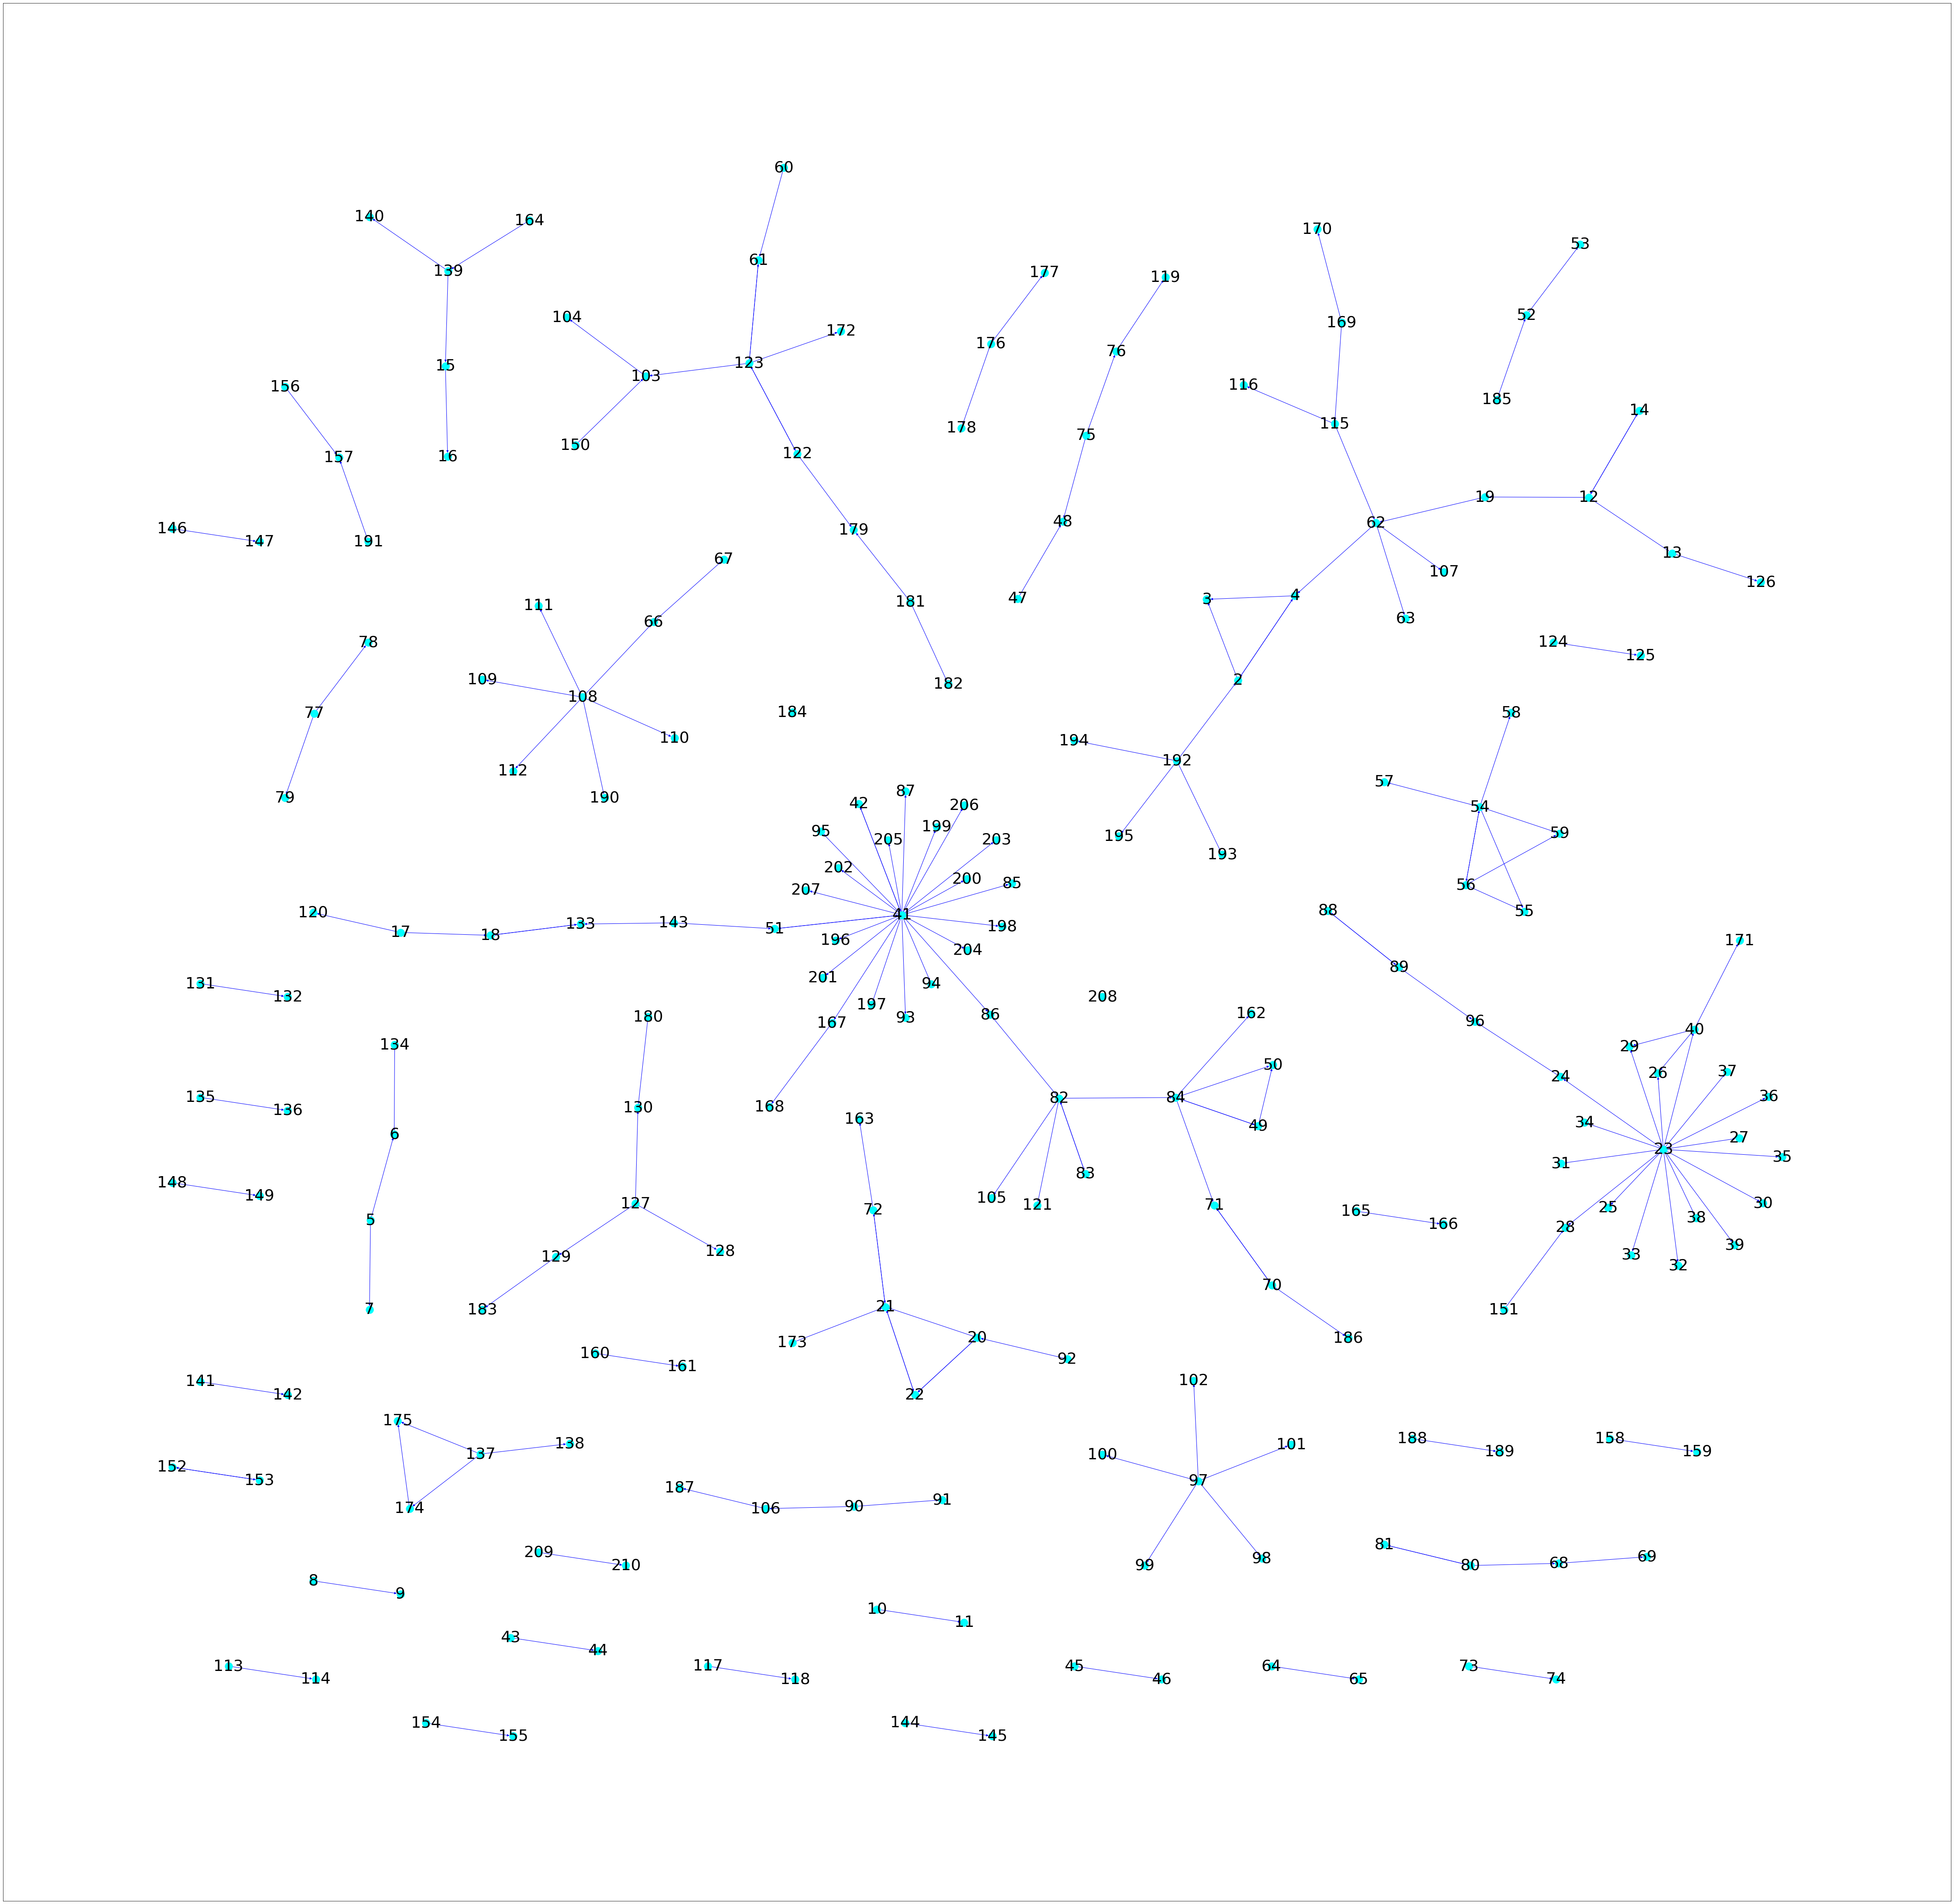

In [33]:
plt.figure(figsize=(80,80)) 
nx.draw_networkx(C,
         pos=nx.nx_pydot.graphviz_layout(C),
         edge_color='blue',
         node_color='cyan',
         font_size=36)

plt.draw()

### Let's find the top five email distributors by number of unique recipients

In [28]:
df_split = df['from_to'].apply(pd.Series)

df_top_senders = df_split.groupby(0).count().sort_values(by=1).tail(5)

df_top_senders

1
0       
86   202
107  204
121  222
82   227
160  334

### Let's then filter our original dataframe for those senders

In [29]:
df_filter = df_split[df_split[0].isin(df_top_senders.index)]

df[df.index.isin(df_filter.index)]

0 1     from_to
61       82 83    [82, 83]
63       82 84    [82, 84]
68       82 86    [82, 86]
84      82 105   [82, 105]
97      82 121   [82, 121]
...        ...         ...
25478  160 496  [160, 496]
25487  107 222  [107, 222]
25496  160 857  [160, 857]
25509  160 346  [160, 346]
25557  121 458  [121, 458]

[1189 rows x 2 columns]

### Plot results

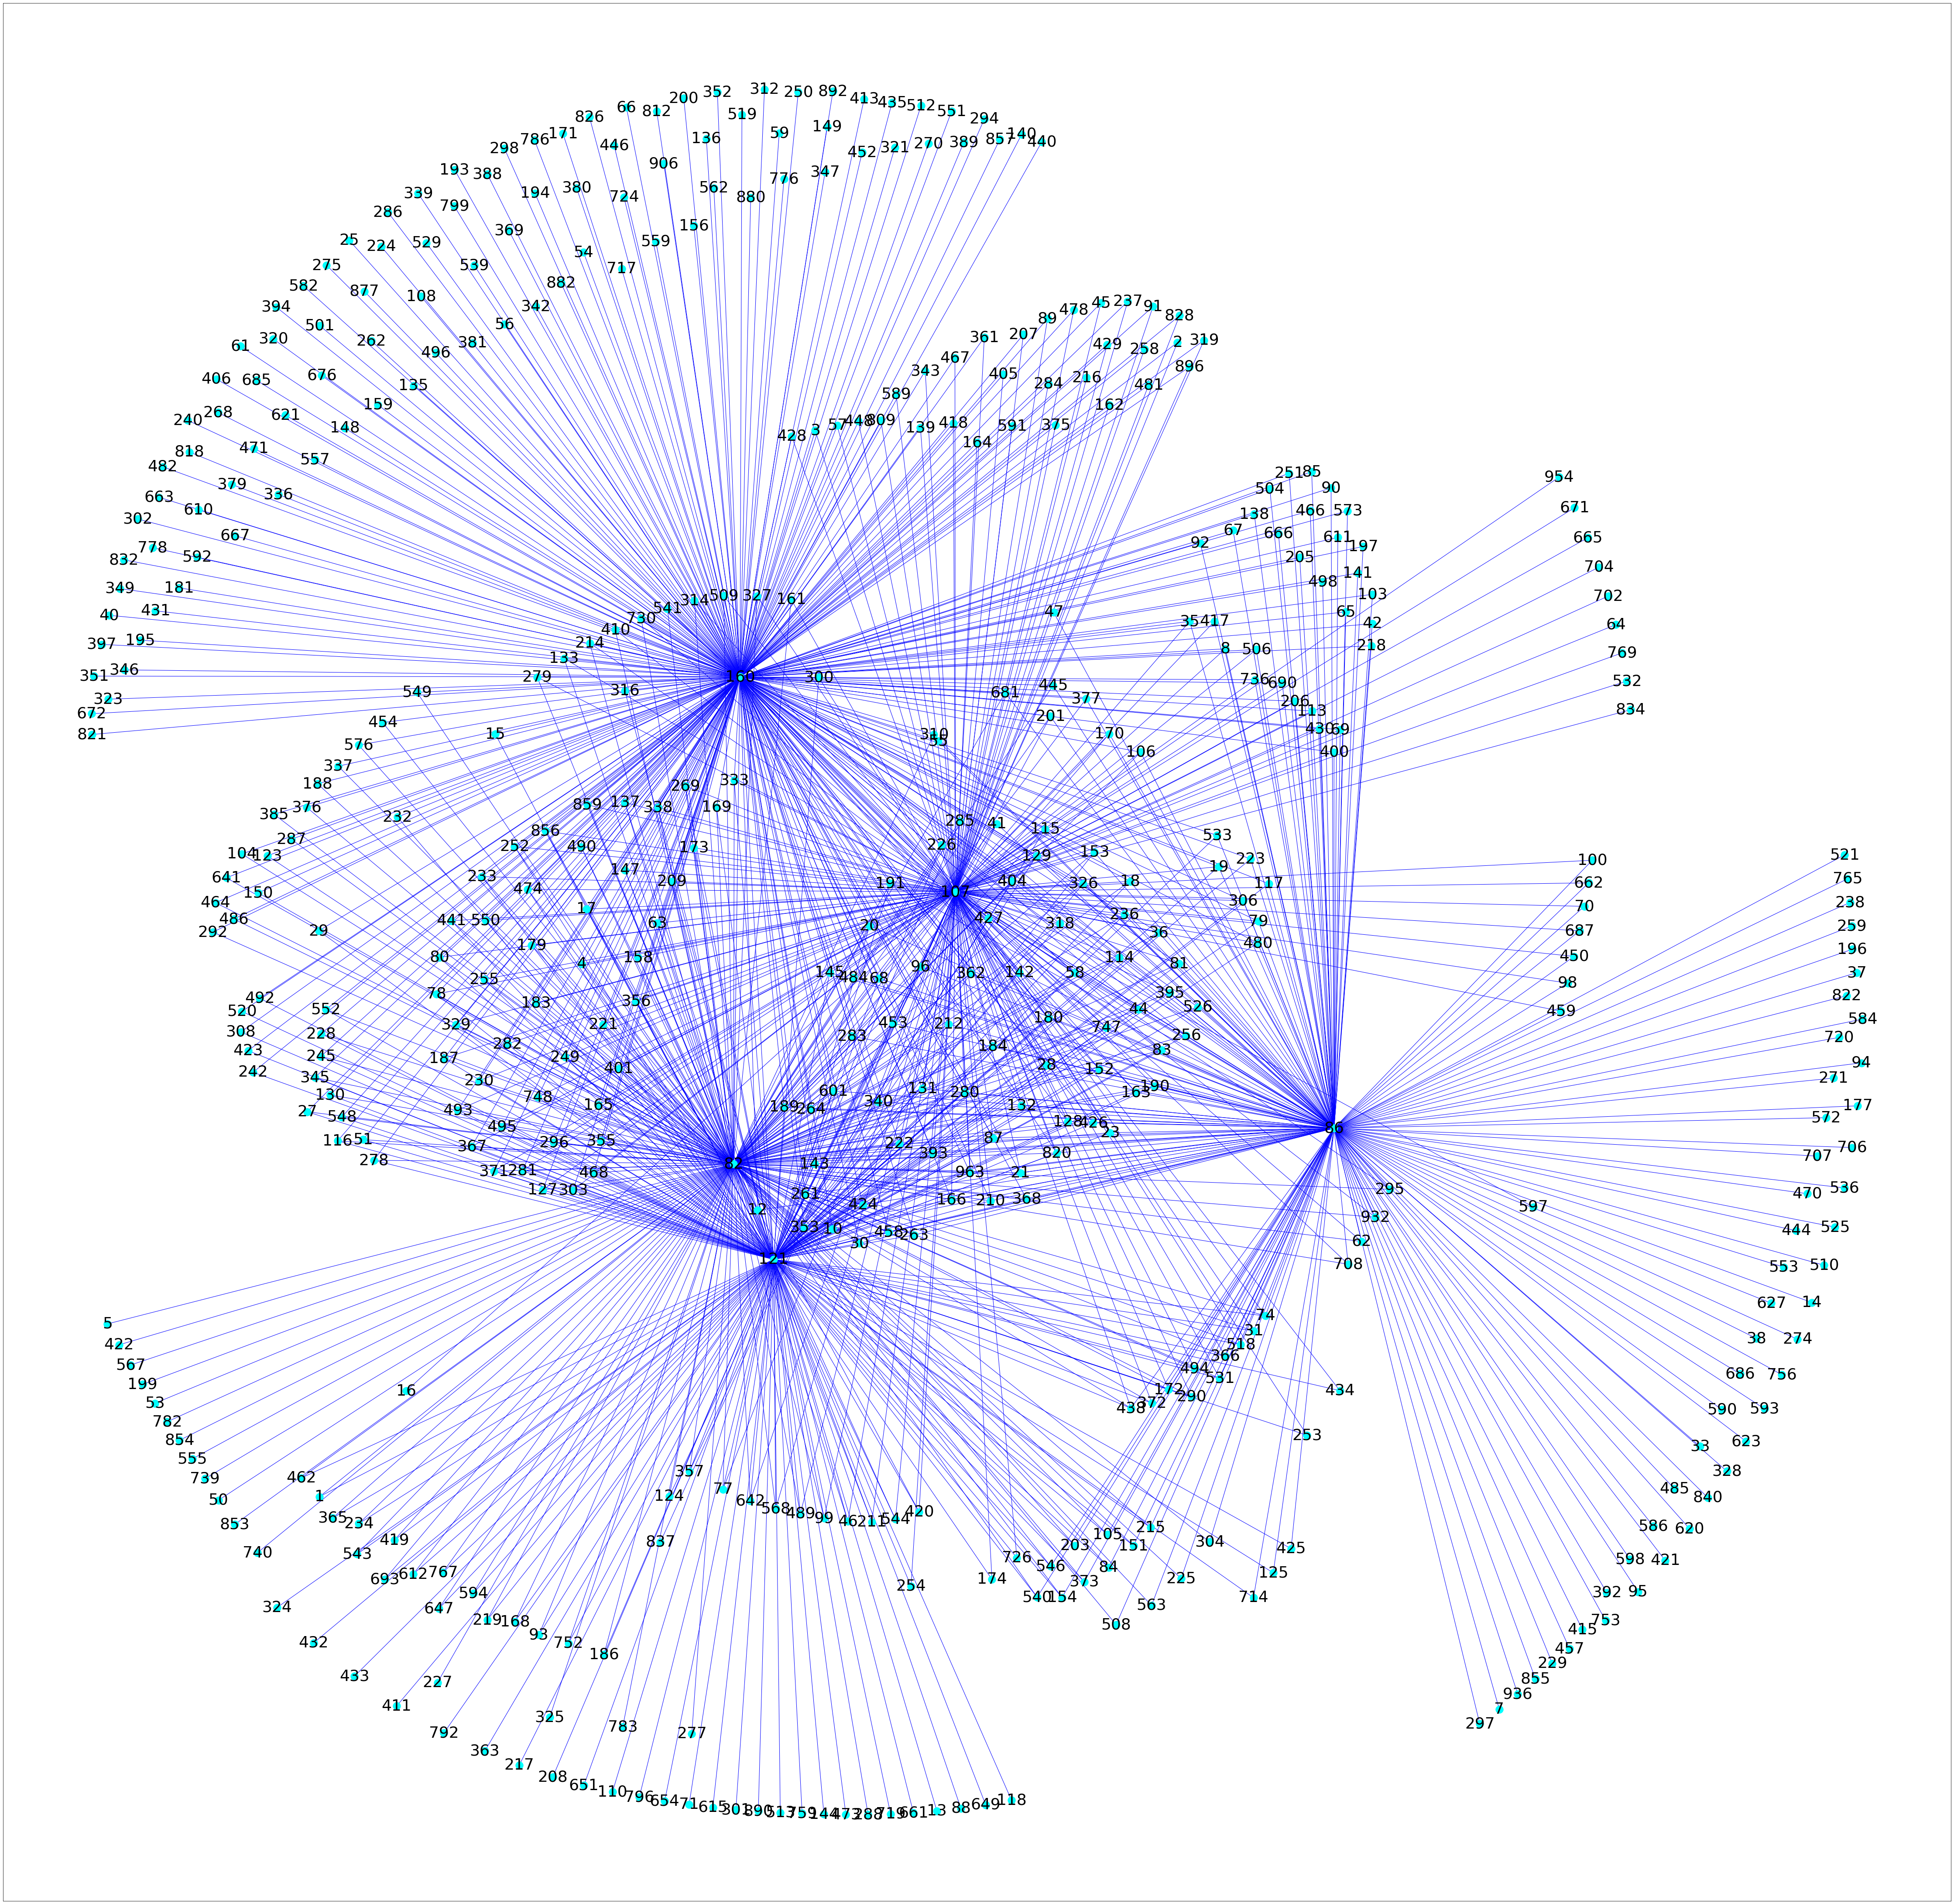

In [30]:
C_top_senders = nx.Graph()
C_top_senders.add_edges_from(df[df.index.isin(df_filter.index)]['from_to'])

plt.figure(figsize=(80,80)) 
nx.draw_networkx(C_top_senders,
         pos=nx.nx_pydot.graphviz_layout(C_top_senders),
         edge_color='blue',
         node_color='cyan',
         font_size=36)
plt.draw()